<a href="https://colab.research.google.com/github/bhogasena/Course/blob/master/Loan_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as py
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [ ]:
df_loan = pd.read_csv('loan.csv',low_memory=False)
df_loan.shape

(39717, 111)

**Data Cleaning**

*   Drop the Columns which have all NaN Values.
*   Analyze the columns which have more NaN values to see if we can ignore or not (ex:mths_since_last_record, mths_since_last_delinq,next_pymnt_d).
*   Drop the Unnecessary columns





 





In [ ]:
df_loan.dropna(axis=1,how='all',inplace=True)   #drop the columns which have all NaN Values
df_loan.drop(df_loan.loc[:,list((df_loan.isna().sum()/len(df_loan.index))*100> 70)].columns,axis=1,inplace=True)  #drop the columns where >70% values are NaN


In [ ]:
df_loan.drop(df_loan.loc[:,(df_loan.nunique()==1).values.tolist()].columns,axis=1,inplace=True)  #drop columns which has same value in all rows
df_loan.drop(df_loan.loc[:,df_loan.nunique()==len(df_loan.index)].columns,axis=1,inplace=True)  #drop columns which have all unique values for all rows


In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [ ]:
df_loan.int_rate = df_loan.int_rate.apply(lambda val: val.strip('%'))
df_loan.loan_status = df_loan.loan_status.replace('Current','Good')
df_loan.loan_status = df_loan.loan_status.replace('Fully Paid','Good')
df_loan.loan_status = df_loan.loan_status.replace('Charged Off','Bad')

**Check the Count of Good and Bad Loans**

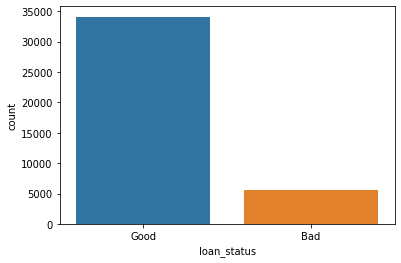

In [ ]:
sns.countplot(data=df_loan,x='loan_status')

In [ ]:
px.box(data_frame=df_loan,y='annual_inc',color='loan_status')


In [ ]:
df_loan.drop(df_loan.index[df_loan.annual_inc>1250000],inplace=True) # Drop the rows whose annual income is > 1.25 as there are no Bad loans for them

In [ ]:
df_loan.annual_inc.describe()

temp=df_loan[df_loan.annual_inc>1250000  ]
px.box(data_frame=df_loan[df_loan.annual_inc<125000],y='annual_inc',color='loan_status')

**Analyze the People's Income < 125**

**As per below graph, Borrower's annual income < 50k tends to be more Risky**

In [566]:
#px.histogram(data_frame=df_loan[df_loan.annual_inc<125000],x='annual_inc',color='loan_status',nbins=15,histnorm='probability')
fig=make_subplots(rows=2, cols=2,subplot_titles=['Annual Income : 0-100k','Annual Income : 100k-150K','Annual Income : 150k-200K','Annual Income : 200k-1.25M'])

def prepare_figures(start,end,row,col,bins):
  df_good = df_loan[ (df_loan.annual_inc>=start) &(df_loan.annual_inc<=end)& (df_loan.loan_status=='Good') ]['annual_inc']
  df_bad = df_loan[(df_loan.annual_inc>=start) &(df_loan.annual_inc<=end) & (df_loan.loan_status=='Bad')]['annual_inc']

  fig.add_trace(go.Histogram(
      x=df_good,
      histnorm='probability',
      name='Good', # name used in legend and hover labels
      marker_color='green',
      xbins=dict(
              start=start,
              end=end,
              size=(end-start)//bins), 
      autobinx=False,
      opacity=0.75),  
      row=row,
      col=col)
  fig.add_trace(go.Histogram(
      x=df_bad,
      histnorm='probability',
      name='Bad', # name used in legend and hover labels
      xbins=dict(
                 start=start,
                 end=end,
                 size=(end-start)//bins), 
      autobinx=False,
      marker_color='red',
      opacity=0.75),
      row=row,
      col=col)
prepare_figures(0,100000,1,1,10)
prepare_figures(100000,150000,1,2,10)
prepare_figures(150000,200000,2,1,10)
prepare_figures(200000,1250000,2,2,10)
fig.update_layout(bargap=0.1,xaxis_title_text='Annual Income',yaxis_title_text='probability')
fig.show()

In [ ]:
df_loan[(df_loan.annual_inc<50000) & (df_loan.loan_status=='Bad') ].index

In [575]:
px.box(data_frame=df_loan[df_loan.annual_inc<50000],y='loan_amnt',color='loan_status')